In [286]:
# Importing Libraries 
import serial 
import time 
import matplotlib.pyplot as plt
arduino = serial.Serial(port='COM5', baudrate=9600, timeout=.1) 
from matplotlib import style
import numpy as np



In [287]:
#style.available
style.use('classic')

In [299]:
def str2arr(coor):
    without_brackets = coor[1:-1]
    vals = without_brackets.split(",")

    try:
        vals_float = [float(val) for val in vals]
    except:
        vals_float = [0.0,0.0,0.0,0.0]
    return vals_float

#def str2arr(coor):
#    without_brackets = coor[1:-1]
#    vals = without_brackets.split(",")
#    vals_float = []
#    for val in vals:
#        if val != '':
#            vals_float.append(float(val))
#    return vals_float

In [290]:
#split_this = "b'(2,3,5);(7,3,4);(9,10,22);'"
#split_this = "b'(2,3,5)'"
#split_this = "b'(2,3,5);(7,3,4);'"

#first_split = split_this.split("'")
#print(first_split)

#second_split = first_split[1]
#print(second_split)

#third_split = second_split.split(";")[:,-1]
#print(third_split)

#fourth_split = [str2arr(coor) for coor in third_split]
#print(fourth_split)


In [291]:
#from time import time

In [292]:
#tic = time()
#print(serial2coors(split_this))
#toc = time()

In [293]:
#toc-tic

In [294]:
def just_read():
	data = arduino.readline()
	word = str(data)
	stuff = word.split("'")
	num = int(stuff[1])
	return num

In [295]:
def read2array(message):
    message = arduino.readline()
    coors = serial2coors(message)
    return coors

In [296]:
def serial2coors(message):
    coors_str = message.split("'")[1]
    coors
    if len(coors_str) != 1:
        coors_str = coors_str[:-1]
    print(coors_str)
    coors_arr = [str2arr(coor) for coor in coors_str]
    return coors_arr

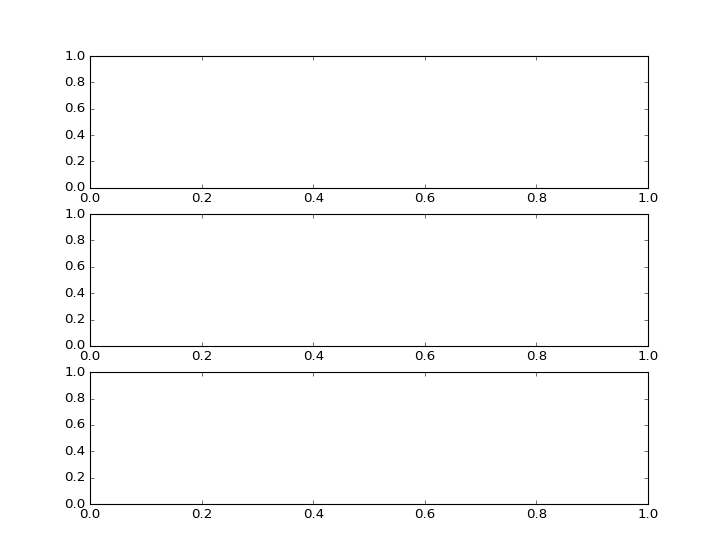

In [302]:
#%matplotlib widget
# Now we are going to make a code to plot things
#ax = plt.figure(figsize = (6,6)).add_subplot(projection='3d')
fig, axs = plt.subplots(nrows = 3, ncols = 1,figsize= (9,7))

#x0 = np.array([0,0]) # Defining initial position
#v0 = np.array([0,0]) # Defining initial velocity
#a0 = np.array([0,0])

x0 = np.array([0,0,0]) # Defining initial position
v0 = np.array([0,0,0]) # Defining initial velocity
a0 = np.array([0,0,0])

# Initializing list of arrays
x_list = []
v_list = []
a_list = []

butt_state_list = []

x_list.append(x0)
v_list.append(v0)
a_list.append(a0)


dt = 1e-3*1 #ms


#ax.set_xlabel("$x$", fontsize = 16)
#ax.set_ylabel("$y$", fontsize = 16)
#ax.set_zlabel("$z$", fontsize = 16)
#ax.set_xlim([-1,1])
#ax.set_ylim([-1,1])
#ax.set_zlim([-1,1])

plt.ion()
plt.show()

In [303]:


accel_offset = np.empty(2)
first_time = True

step = 0
tic = time.time()

while True:
	

	message = str(arduino.readline())
	#print(type(message))
	
	
    
	if message != "b''":
		#print(message)
		preprocess_accels = message.split("'")[1:-1][0].split(";")[:-1]
		states = [str2arr(coor) for coor in preprocess_accels]
		for state in states:
			step += 1
			accel_mg = np.array(state[:-1])
			accel = 9.81e-3*accel_mg
			butt_state_list.append(state[-1])
			#accel_xy = (accel*np.heaviside(np.abs(accel)-0.5,0))[:-1]
			accel_xy = accel
			#print(accel_xy)
			a_list.append(accel_xy)
			#x_list.append(x_list[-1] + v_list[-1]*dt + 0.5*accel_xy*(dt**2))
			#v_list.append(v_list[-1]+0.5*(a_list[-2]+a_list[-1])*dt)
			#a_list.a

			if step%100 == 0:
				fig.canvas.flush_events()
				toc = time.time()
				plot_time = toc-tic
				axs[0].scatter(plot_time, a_list[-1][0])
				axs[1].scatter(plot_time, a_list[-1][1])
				axs[2].scatter(plot_time, a_list[-1][2])
				fig.canvas.draw()


			
				



		

	#	print(message)

	#num = input("Enter a number: ") # Taking input from user 

	#print(accels)
	#for accel in accels:
	#	acceleration_list.append(accel)
    #    if len(acceleration_list) == 1:
        

	

	#print(coors) # printing the value


KeyboardInterrupt: 